In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
ufo_df = pd.read_csv('ufo.csv')

C:\Users\randy\AppData\Local\Temp\ipykernel_12240\1796891691.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_df = pd.read_csv('ufo.csv')


In [4]:
ufo_df['date posted'] = pd.to_datetime(ufo_df['date posted']) # Converts date posted from str to date time

In [5]:
ufo_df.at[27822, 'duration (seconds)'] = 2 #this few lines manually change the value since they had random apostrophes
ufo_df.at[35692, 'duration (seconds)'] = 8
ufo_df.at[58591, 'duration (seconds)'] = 0.5
ufo_df['duration (seconds)'] = pd.to_numeric(ufo_df['duration (seconds)']) #Converts seconds from str to float

In [6]:
ufo_df[['date','time']] = ufo_df['datetime'].str.split(expand=True) # Uses datetime column to create two columns, date and time, by splitting the string in datetime
ufo_df['date'] = pd.to_datetime(ufo_df['date']) # Converts object date to a datetime
ufo_df['time'] = ufo_df['time'] + ':00' # Adds ':00' to time object to fit format of a time by adding a placeholder for seconds
ufo_df['date1'] = ufo_df['date'] # A clone for datatime date
ufo_df['time1'] = ufo_df['time'] # A clone for object time
ufo_df['datetime'] = (pd.to_datetime(ufo_df.pop('date1'), format='%d/%m/%Y') + 
                  pd.to_timedelta(ufo_df.pop('time1'))) # reformats date1 to datetime and time1 to datatime to then combine the clones to reformat object datetime to a datetime

# Datetime conversions

In [7]:
ufo_df['year']= ufo_df['date'].dt.strftime("%Y") # Creates a column of just the years from the datetime date, and displaying only the last two digits

In [8]:
ufo_df.head(8) # just takes the top 8 rows

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949-10-10,20:30:00,1949
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00:00,1949
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00:00,1955
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956-10-10,21:00:00,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960-10-10,20:00:00,1960
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889,1961-10-10,19:00:00,1961
6,1965-10-10 21:00:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000,1965-10-10,21:00:00,1965
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333,1965-10-10,23:45:00,1965


In [9]:
ufo_df.info()  #checks the data types so we can make sure they are what we want

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  float64       
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  datetime64[ns]
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
 11  date                  80332 non-null  datetime64[ns]
 12  time                  80332 non-null  object        
 13  year            

In [10]:
# Questions: City with the most sightings? Average duration of sighting? What times, months, and years were sightings popular? Most common shape? Any changes over the years?

In [11]:
most_common_cities = ufo_df.city.value_counts()
most_common_cities.head(3)

#counts the amount of time a city was reported and takes the top 3

seattle     525
phoenix     454
portland    374
Name: city, dtype: int64

In [12]:
most_common_shapes = ufo_df['shape'].value_counts()
most_common_shapes.head(3)

#this is similar to the code above but takes shape instead.

light       16565
triangle     7865
circle       7608
Name: shape, dtype: int64

In [13]:
seconds_viewed = ufo_df['duration (seconds)'].mean()
seconds_to_mins = seconds_viewed/60

print(seconds_to_mins, 'mins')

#this takes the seconds column and gets the average, then converts that to mins

150.28148360574448 mins


In [14]:
ufo_df['seconds to mins'] = ufo_df['duration (seconds)'].mean()
ufo_df['seconds to mins'] = ufo_df['duration (seconds)']/60
ufo_df

#this just adds the seconds to mins in the dataframe

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year,seconds to mins
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949-10-10,20:30:00,1949,45.000000
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00:00,1949,120.000000
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00:00,1955,0.333333
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956-10-10,21:00:00,1956,0.333333
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960-10-10,20:00:00,1960,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444,2013-09-09,21:15:00,2013,10.000000
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500,2013-09-09,22:00:00,2013,20.000000
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444,2013-09-09,22:00:00,2013,20.000000
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556,2013-09-09,22:20:00,2013,0.083333


In [15]:
ufo_df['mins to hrs'] = ufo_df['seconds to mins'].mean()
ufo_df['mins to hrs'] = ufo_df['seconds to mins']/60
ufo_df


#this just adds the mins to hrs in the dataframe

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year,seconds to mins,mins to hrs
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949-10-10,20:30:00,1949,45.000000,0.750000
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00:00,1949,120.000000,2.000000
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00:00,1955,0.333333,0.005556
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956-10-10,21:00:00,1956,0.333333,0.005556
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960-10-10,20:00:00,1960,15.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444,2013-09-09,21:15:00,2013,10.000000,0.166667
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500,2013-09-09,22:00:00,2013,20.000000,0.333333
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444,2013-09-09,22:00:00,2013,20.000000,0.333333
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556,2013-09-09,22:20:00,2013,0.083333,0.001389


In [16]:
longest_time_per_shape = ufo_df.groupby('shape')['mins to hrs'].sum()
longest_time_per_shape.sort_values(ascending=False).head(5)

#this just uses the group by function from the data set that takes every shape groups them and sums the mins to hrs for all of them.
#then we only take the 5 most mins to hrs.

shape
light      60601.880864
sphere     32602.271003
other      32378.516058
circle     10075.244944
unknown     8603.583836
Name: mins to hrs, dtype: float64

In [17]:
#Questions: what does a time series graph look like for sightings over years.

In [18]:
ufo_df2 = ufo_df.sort_values('year', ascending=True)

onlyyears = ufo_df2.groupby(['year'])['year'].count().reset_index(name='counts')
onlyyears

# this grabs the data and puts it in a new data frame that sorts the years ascending, 
#then i make a new data frame out of the second data frame that just just takes the year and adds a count column that counts everytime a year is repeated in the dataframe

,year,counts
0,1906,1
1,1910,2
2,1916,1
3,1920,1
4,1925,1
...,...,...
82,2010,4283
83,2011,5107
84,2012,7357
85,2013,7037


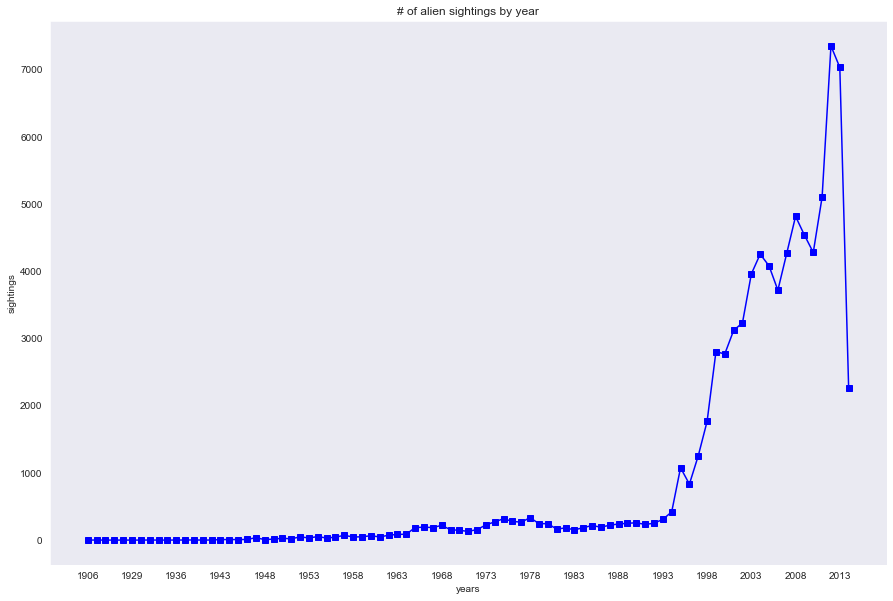

In [19]:
sns.set_style('dark')
plt.figure(figsize=(15,10))
plt.plot(onlyyears.year,onlyyears.counts,'s-b')
listOf_Xticks = np.arange(0, 87, 5)
plt.xticks(listOf_Xticks)
plt.title('# of alien sightings by year')
plt.xlabel('years')
plt.ylabel('sightings');


#this just adds some style to the graph nothing more

In [30]:
only2014 = ufo_df.loc[ufo_df['year'] == '2014']
only2014

#as you can see this is why 2014 looks low becuase the year has not finished in the data. only months 1-5 are here.

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year,seconds to mins,mins to hrs
7612,2014-01-10 06:00:00,placentia,ca,us,rectangle,60.0,~1 minute,EXTRATERRESTRIAL MULTICOLOR SPACECRAFT OVER GO...,2014-01-16,33.8722222,-117.869444,2014-01-10,06:00:00,2014,1.00,0.016667
7613,2014-01-10 06:15:00,el paso,tx,us,circle,120.0,~2 minutes,Single round&#44 reddish yellowish&#44 greenis...,2014-01-16,31.7586111,-106.486389,2014-01-10,06:15:00,2014,2.00,0.033333
7614,2014-01-10 06:30:00,coal creek,co,us,sphere,1200.0,20 minutes,Large&#44 yellowish white reflective sphere wi...,2014-01-10,38.3611111,-105.147778,2014-01-10,06:30:00,2014,20.00,0.333333
7615,2014-01-10 09:57:00,hartford,ct,us,flash,120.0,2 minute,((HOAX??)) While i was watching a movie a whit...,2014-02-14,41.7636111,-72.685556,2014-01-10,09:57:00,2014,2.00,0.033333
7616,2014-01-10 16:30:00,pendle (uk/england),NaN,NaN,light,900.0,15 minutes,A light hovered down the hill at a ridiculous ...,2014-01-16,53.845,-2.204000,2014-01-10,16:30:00,2014,15.00,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46153,2014-05-07 21:10:00,naugatuck,ct,us,unknown,300.0,5 minutes,Large formation of lights in western sky&#44 f...,2014-05-08,41.4858333,-73.051111,2014-05-07,21:10:00,2014,5.00,0.083333
46154,2014-05-07 21:20:00,hillsboro,mo,us,fireball,360.0,4-6 minutes,Round slow moving silent ball looked like a ca...,2014-05-08,38.2322222,-90.562778,2014-05-07,21:20:00,2014,6.00,0.100000
46155,2014-05-07 23:30:00,san isidro,nm,NaN,unknown,15.0,15 seconds,2 red lights gliding across sky&#44 then green...,2014-05-08,35.563363,-106.770591,2014-05-07,23:30:00,2014,0.25,0.004167
46301,2014-05-08 00:00:00,memphis,tn,us,rectangle,900.0,15 minutes,Standing at my window around 0:00 brilliantly ...,2014-05-08,35.1494444,-90.048889,2014-05-08,00:00:00,2014,15.00,0.250000
